In [2]:
import pandas as pd
import numpy as np

vgames2_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df = pd.read_csv(vgames2_url)

df = df.rename(columns = {'Unnamed: 0' : 'Index'})
df = df.set_index(keys = df['Index'])
df = df.drop(df.columns[0], axis = 1)

#df = df.loc[(df['Year']<=1900)]

df

pd.set_option('display.max_rows', 100)

df = df.dropna(axis = 0) # Get rid of N/A data
df = df.astype({'Year' : int}) # Convert data type float to int

df['Year'] = np.where(df['Year']<86, df['Year']+2000, df['Year']) # Edit year data that are smaller than 86
df['Year'] = np.where((df['Year']>85) & (df['Year']<99), df['Year']+1900, df['Year']) # Edit Year data that are between 85 and 99

df['NA_Sales'] = df['NA_Sales'].str.replace('M', ' ')
df['NA_Sales'] = df['NA_Sales'].str.replace('K', '000')

df['EU_Sales'] = df['EU_Sales'].str.replace('M', ' ')
df['EU_Sales'] = df['EU_Sales'].str.replace('K', '000')

df['JP_Sales'] = df['JP_Sales'].str.replace('M', ' ')
df['JP_Sales'] = df['JP_Sales'].str.replace('K', '000')

df['Other_Sales'] = df['Other_Sales'].str.replace('M', ' ')
df['Other_Sales'] = df['Other_Sales'].str.replace('K', '000')


df = df.astype({'NA_Sales' : float})
df = df.astype({'EU_Sales' : float})
df = df.astype({'JP_Sales' : float})
df = df.astype({'Other_Sales' : float})

df['NA_Sales'] = np.where(df['NA_Sales']>1000, df['NA_Sales']/1000000, df['NA_Sales'])
df['EU_Sales'] = np.where(df['EU_Sales']>1000, df['EU_Sales']/1000000, df['EU_Sales'])
df['JP_Sales'] = np.where(df['JP_Sales']>1000, df['JP_Sales']/1000000, df['JP_Sales'])
df['Other_Sales'] = np.where(df['Other_Sales']>1000, df['Other_Sales']/1000000, df['Other_Sales'])

df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

df['Year_Eighties'] = np.where((df['Year']>1979) & (df['Year']<1990), df['Year'], None)
df['Year_Nineties'] = np.where((df['Year']>1989) & (df['Year']<2000), df['Year'], None)
df['Year_Noughties'] = np.where((df['Year']>1999) & (df['Year']<2010), df['Year'], None)
df['Year_Tenties'] = np.where((df['Year']>2009) & (df['Year']<2020), df['Year'], None)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_Eighties,Year_Nineties,Year_Noughties,Year_Tenties
Index,,,,,,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,None,None,2008,None
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,None,None,2009,None
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,None,None,None,2010
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,None,None,None,2010
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,None,None,None,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,None,None,2006,None
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,None,None,2005,None
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,None,None,None,2015


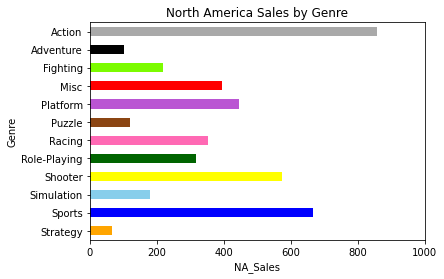

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

data_NA_Sales = df.groupby(['Genre'])['NA_Sales'].sum().fillna(0)
data_NA_Sales = data_NA_Sales.sort_index(ascending = False)
plt.rc('font', family = 'MalGun Gothic')
plt.xlabel('NA_Sales')
plt.ylabel('Genre')
plt.title('North America Sales by Genre')
data_NA_Sales.plot(kind = 'barh', xlim = (0, 1000), color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.show()

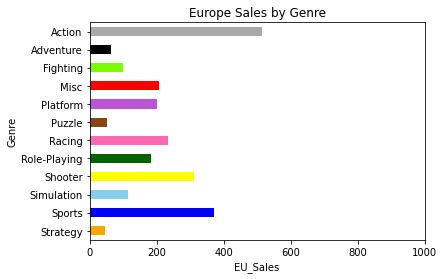

In [5]:
data_EU_Sales = df.groupby(['Genre'])['EU_Sales'].sum().fillna(0)
data_EU_Sales = data_EU_Sales.sort_index(ascending = False)
plt.rc('font', family = 'MalGun Gothic')
plt.xlabel('EU_Sales')
plt.ylabel('Genre')
plt.title('Europe Sales by Genre')
data_EU_Sales.plot(kind = 'barh', xlim = (0, 1000), color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.show()

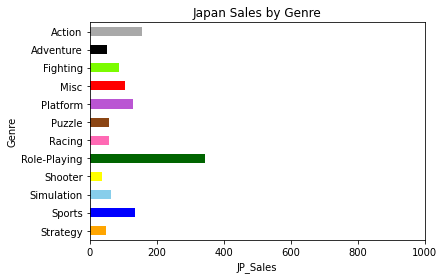

In [6]:
data_JP_Sales = df.groupby(['Genre'])['JP_Sales'].sum().fillna(0)
data_JP_Sales = data_JP_Sales.sort_index(ascending = False)
plt.rc('font', family = 'MalGun Gothic')
plt.xlabel('JP_Sales')
plt.ylabel('Genre')
plt.title('Japan Sales by Genre')
data_JP_Sales.plot(kind = 'barh', xlim = (0, 1000), color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.show()

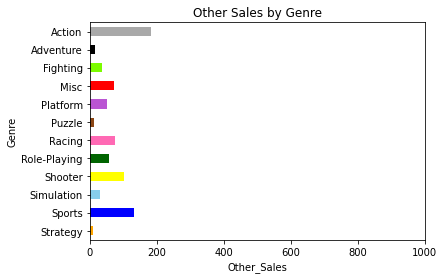

In [7]:
data_Other_Sales = df.groupby(['Genre'])['Other_Sales'].sum().fillna(0)
data_Other_Sales = data_Other_Sales.sort_index(ascending = False)
plt.rc('font', family = 'MalGun Gothic')
plt.xlabel('Other_Sales')
plt.ylabel('Genre')
plt.title('Other Sales by Genre')
data_Other_Sales.plot(kind = 'barh', xlim = (0, 1000), color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.show()

findfont: Font family ['MalGun Gothic'] not found. Falling back to DejaVu Sans.


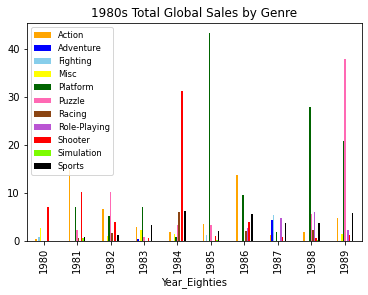

In [6]:
data_80s_Genre = df.groupby(['Genre', 'Year_Eighties'])['Total_Sales'].sum().unstack(level = 0).fillna(0)
plt.rc('font', family = 'MalGun Gothic')
data_80s_Genre.plot(kind = 'bar', color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.title('1980s Total Global Sales by Genre')
plt.legend(fontsize = 'small')

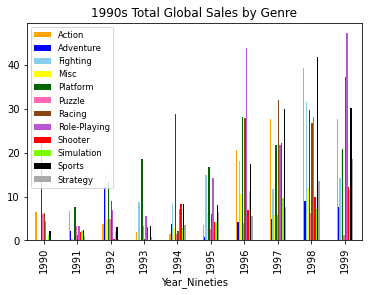

In [7]:
data_90s_Genre = df.groupby(['Genre', 'Year_Nineties'])['Total_Sales'].sum().unstack(level = 0).fillna(0)
plt.rc('font', family = 'MalGun Gothic')
data_90s_Genre.plot(kind = 'bar', color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.title('1990s Total Global Sales by Genre')
plt.legend(fontsize = 'small')

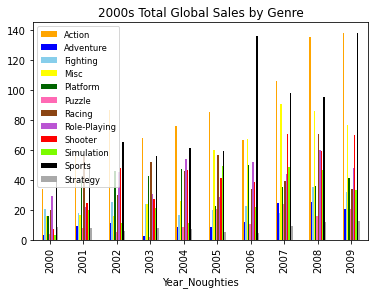

In [8]:
data_00s_Genre = df.groupby(['Genre', 'Year_Noughties'])['Total_Sales'].sum().unstack(level = 0).fillna(0)
plt.rc('font', family = 'MalGun Gothic')
data_00s_Genre.plot(kind = 'bar', color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.title('2000s Total Global Sales by Genre')
plt.legend(fontsize = 'small')

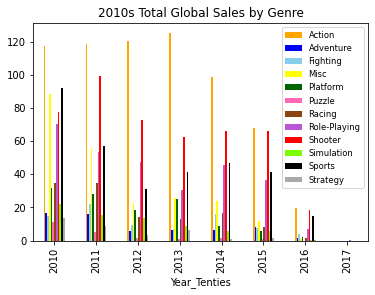

In [47]:
data_10s_Genre = df.groupby(['Genre', 'Year_Tenties'])['Total_Sales'].sum().unstack(level = 0).fillna(0)
plt.rc('font', family = 'MalGun Gothic')
data_10s_Genre.plot(kind = 'bar', color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.title('2010s Total Global Sales by Genre')
plt.legend(fontsize = 'small')

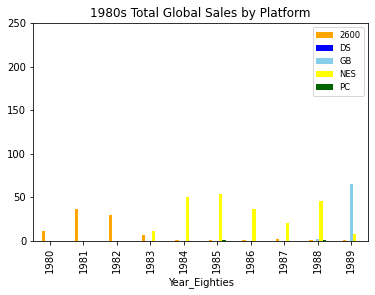

In [10]:
data_80s_Platform = df.groupby(['Platform', 'Year_Eighties'])['Total_Sales'].sum().unstack(level = 0).fillna(0)
plt.rc('font', family = 'MalGun Gothic')
data_80s_Platform.plot(kind = 'bar', ylim = (0, 250), color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.title('1980s Total Global Sales by Platform')
plt.legend(fontsize = 'small')

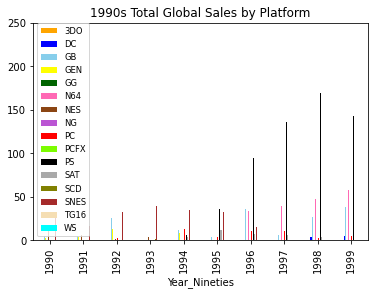

In [11]:
data_90s_Platform = df.groupby(['Platform', 'Year_Nineties'])['Total_Sales'].sum().unstack(level = 0).fillna(0)
plt.rc('font', family = 'MalGun Gothic')
data_90s_Platform.plot(kind = 'bar', ylim = (0, 250), color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey','olive', 'brown', 'wheat', 'aqua'])
plt.title('1990s Total Global Sales by Platform')
plt.legend(fontsize = 'small')

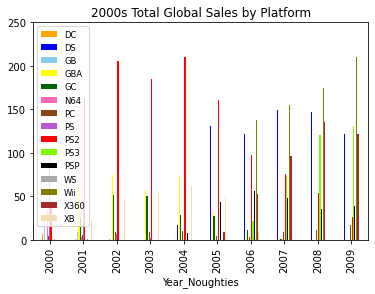

In [12]:
data_00s_Platform = df.groupby(['Platform', 'Year_Noughties'])['Total_Sales'].sum().unstack(level = 0).fillna(0)
plt.rc('font', family = 'MalGun Gothic')
data_00s_Platform.plot(kind = 'bar', ylim = (0, 250), color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey', 'olive', 'brown', 'wheat', 'aqua'])
plt.title('2000s Total Global Sales by Platform')
plt.legend(fontsize = 'small')

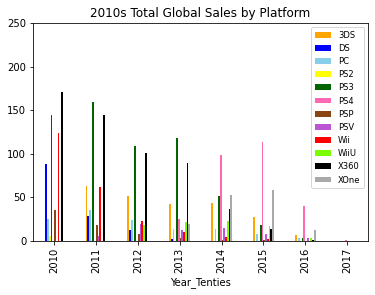

In [13]:
data_10s_Platform = df.groupby(['Platform', 'Year_Tenties'])['Total_Sales'].sum().unstack(level = 0).fillna(0)
plt.rc('font', family = 'MalGun Gothic')
data_10s_Platform.plot(kind = 'bar', ylim = (0, 250), color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey', 'olive', 'brown', 'wheat', 'aqua'])
plt.title('2010s Total Global Sales by Platform')
plt.legend(fontsize = 'small')

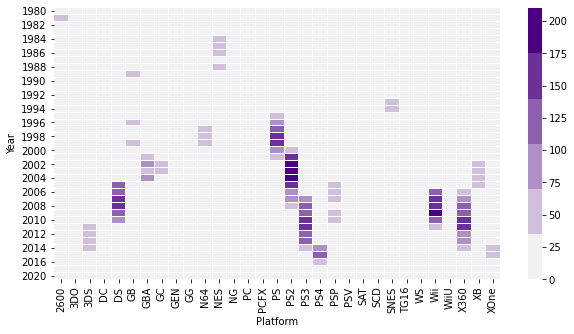

In [8]:
data_Year_Platform = df.groupby(['Platform', 'Year'])['Total_Sales'].sum().unstack(level = 0).fillna(0)
plt.subplots(figsize = (10, 5))
sns.heatmap(data_Year_Platform, annot = False, cmap = sns.light_palette('indigo', 6), linecolor = 'white', linewidths = 0.01)

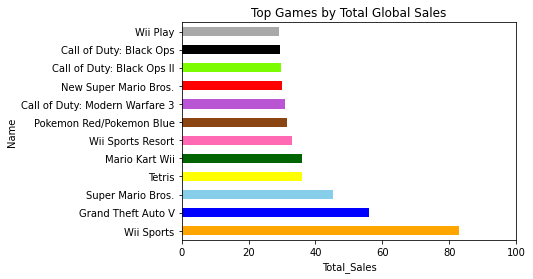

count    12.000000
mean     39.085000
std      15.892849
min      29.010000
25%      29.940000
50%      32.190000
75%      38.207500
max      82.740000
Name: Total_Sales, dtype: float64

In [9]:
date_Name = df.groupby(['Name'])['Total_Sales'].sum().fillna(0)
date_Name = date_Name.sort_values(ascending = False)



plt.xlabel('Total_Sales')
plt.ylabel('Name')
plt.title('Top Games by Total Global Sales')
date_Name.head(12).plot(kind = 'barh', xlim = (0, 100), color = ['orange', 'b', 'skyblue', 'yellow', 'darkgreen', 'hotpink', 'saddlebrown', 'mediumorchid', 'r', 'lawngreen', 'black', 'darkgrey'])
plt.show()


date_Name.head(12).describe()

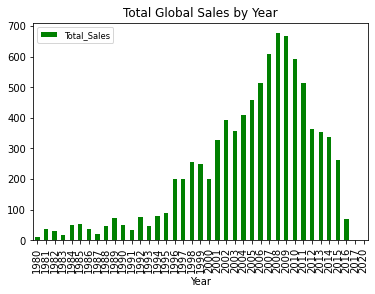

In [13]:
data_Year_Total_Sales = df.groupby(['Year'])['Total_Sales'].sum().fillna(0)
plt.rc('font', family = 'MalGun Gothic')
data_Year_Total_Sales.plot(kind = 'bar', color = ['green'])
plt.title('Total Global Sales by Year')
plt.legend(fontsize = 'small')

In [15]:
data_10s_Top_Games = df.groupby(['Name'])['Year_Tenties', 'Total_Sales'].sum().fillna(0)
data_10s_Top_Games = data_10s_Top_Games.sort_values(by = 'Total_Sales', ascending = False)
data_10s_Top_Games.describe()

#Description of Total Sales in the recent 2010s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total_Sales
count,11295.000000
mean,0.775154
std,2.242044
min,0.010000
25%,0.060000
50%,0.190000
75%,0.610000
max,82.740000
